In [16]:
import pandas as pd
import numpy as np

# Load the CSV file
file_path = './sentiment_statisticscc1e57a.csv' 
data = pd.read_csv(file_path)

# Display the first few rows of the data to confirm it loaded correctly
print(data.head())


   call_id      agent_id   agent_tone   customer_tone   average_sentiment   \
0   4667960400     963118  neutral      angry           -0.04                
1   1122072124     519057  calm         neutral         0.02                 
2   6834291559     158319  neutral      polite          -0.13                
3   2266439882     488324  neutral      frustrated      -0.2                 
4   1211603231     721730  neutral      polite          -0.05                

   silence_percent_average  
0                     0.39  
1                     0.35  
2                     0.32  
3                     0.20  
4                     0.35  


# Sentiment Distribution
## To show how the average sentiment scores are distributed across the data.
### This will help in visualizing the overall sentiment trend. For example, it will show if most calls have neutral, positive, or negative sentiment, revealing patterns of customer-agent interactions.

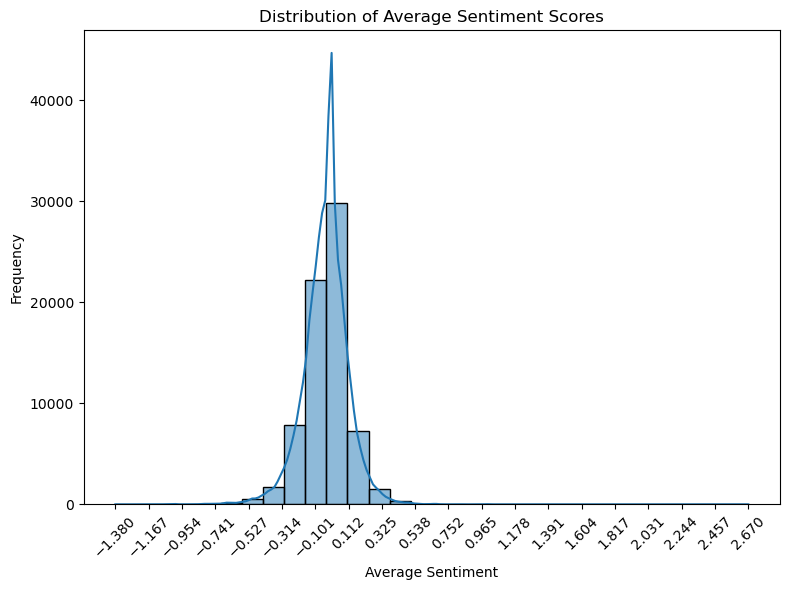

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Ensure correct column name and convert to numeric
data['average_sentiment '] = pd.to_numeric(data['average_sentiment '], errors='coerce')

# Drop rows where average_sentiment could not be converted to a number
data = data.dropna(subset=['average_sentiment '])

# Sentiment Distribution (Histogram) with lower x-axis resolution
plt.figure(figsize=(8, 6))

# Adjust number of bins
sns.histplot(data['average_sentiment '], kde=True, bins=30)

# Set the title and labels
plt.title('Distribution of Average Sentiment Scores')
plt.xlabel('Average Sentiment')
plt.ylabel('Frequency')

# Reduce x-axis resolution by specifying fewer ticks
x_ticks = np.linspace(data['average_sentiment '].min(), data['average_sentiment '].max(), 20)  # 5 evenly spaced ticks
plt.xticks(x_ticks, rotation=45)

# Show the plot
plt.tight_layout()
plt.show()


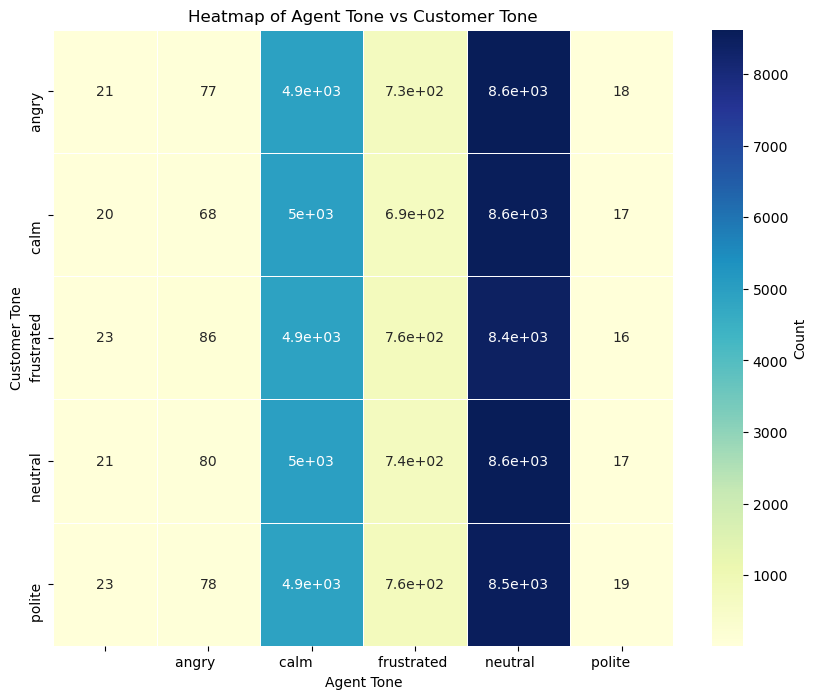

In [32]:
# Create a pivot table for heatmap
pivot_data = data.pivot_table(index='customer_tone ', columns='agent_tone ', aggfunc='size', fill_value=0)

plt.figure(figsize=(10, 8))
sns.heatmap(pivot_data, annot=True, cmap='YlGnBu', linewidths=.5, cbar_kws={"label": "Count"})  # Gradient color with color bar
plt.title('Heatmap of Agent Tone vs Customer Tone')
plt.xlabel('Agent Tone')
plt.ylabel('Customer Tone')
plt.show()


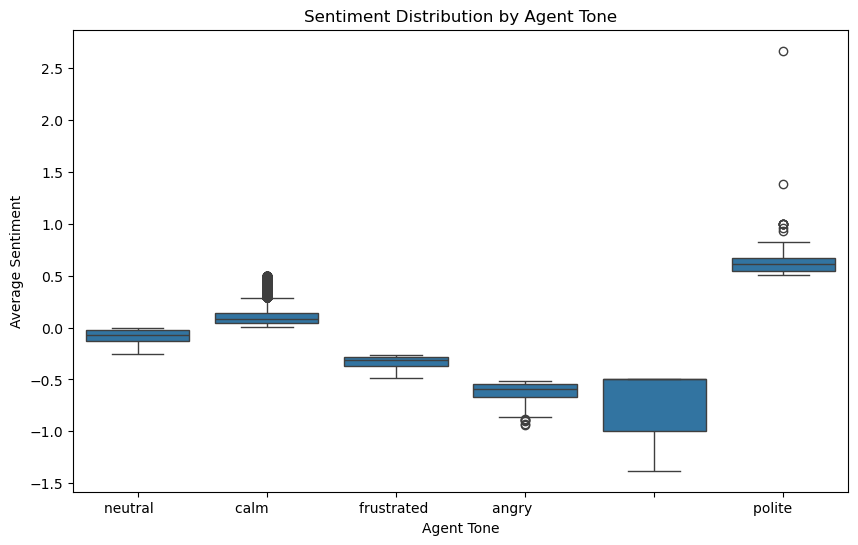

In [34]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='agent_tone ', y='average_sentiment ', data=data)
plt.title('Sentiment Distribution by Agent Tone')
plt.xlabel('Agent Tone')
plt.ylabel('Average Sentiment')
plt.show()


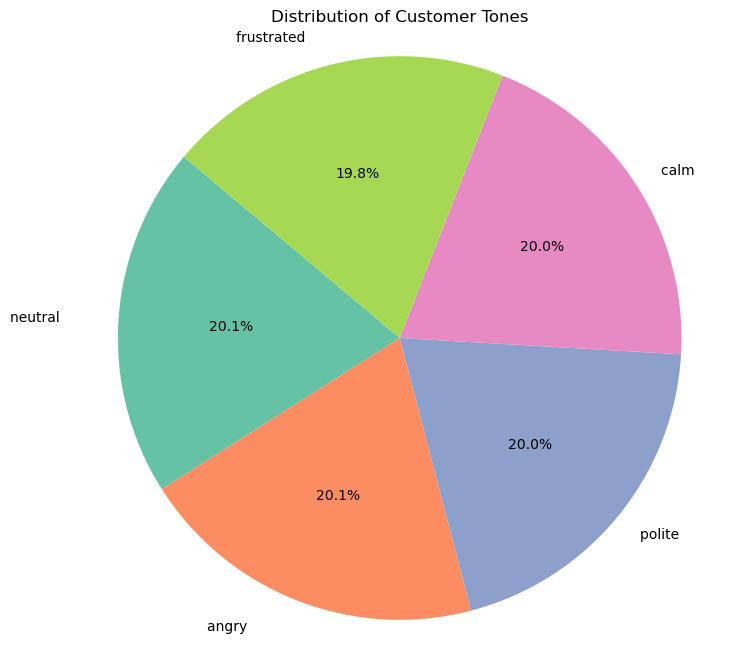

In [35]:
# Calculate the percentage of each customer tone
customer_tone_counts = data['customer_tone '].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(customer_tone_counts, labels=customer_tone_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Set2'))
plt.title('Distribution of Customer Tones')
plt.axis('equal')
plt.show()


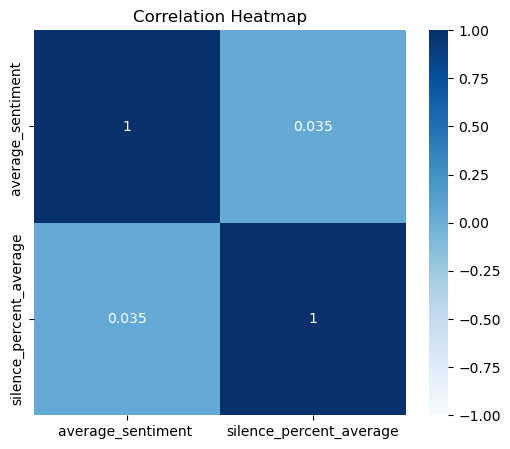

In [37]:
# Calculate the correlation matrix
correlation_matrix = data[['average_sentiment ', 'silence_percent_average']].corr()

plt.figure(figsize=(6, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()


In [39]:
# Load CSV file into a DataFrame
df = pd.read_csv('./reason18315ff.csv')

# Extract the 'Label' column and get distinct values
distinct_labels = df['primary_call_reason'].unique()

# Convert to a list (if needed)
distinct_labels_list = distinct_labels.tolist()

print(distinct_labels_list)

['Voluntary  Cancel', 'Booking', 'IRROPS', 'Upgrade', 'Seating', 'Mileage   Plus', 'Checkout', 'Voluntary   Change', 'Post Flight', 'Check In', 'Other  Topics', 'Communications', 'Schedule Change', 'Products & Services', 'Digital   Support', 'Disability', 'Unaccompanied Minor', 'Baggage', 'Traveler  Updates', 'ETC', 'Voluntary Change', 'Mileage Plus', 'Post-Flight', 'Traveler Updates', 'Voluntary Cancel', 'Check-In', 'Products and Services', 'Other Topics', 'Digital Support', 'Traveler   Updates', 'Digital  Support', 'Mileage  Plus', 'Voluntary  Change']


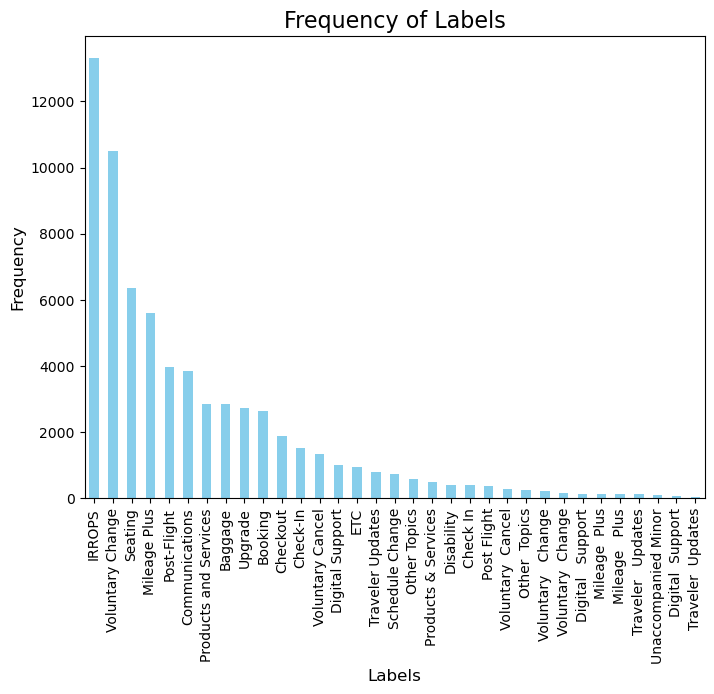

In [40]:
# Extract labels and their frequencies
label_counts = df['primary_call_reason'].value_counts()

# Plotting the bar graph
plt.figure(figsize=(8, 6))
label_counts.plot(kind='bar', color='skyblue')

# Adding title and labels
plt.title('Frequency of Labels', fontsize=16)
plt.xlabel('Labels', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Show the plot
plt.show()

In [42]:
# Load CSV file into a DataFrame
df = pd.read_csv('./callsf0d4f5a.csv')

# Drop a specific column (e.g., 'Feature2')
df = df.drop(columns=['call_transcript'])

# Save the modified DataFrame to a new CSV file
df.to_csv('calls_without_call_transcript.csv', index=False)

print(df)

          call_id  customer_id  agent_id call_start_datetime  \
0      4667960400   2033123310    963118     7/31/2024 23:56   
1      1122072124   8186702651    519057       8/1/2024 0:03   
2      6834291559   2416856629    158319     7/31/2024 23:59   
3      2266439882   1154544516    488324       8/1/2024 0:05   
4      1211603231   5214456437    721730       8/1/2024 0:04   
...           ...          ...       ...                 ...   
71805  1563273072   8022667294    413148     8/31/2024 23:48   
71806  8865997781   4474867021    980156     8/31/2024 23:55   
71807  8019240181   9762042472    616988     8/31/2024 23:52   
71808  8332067080   8095620266    161354     8/31/2024 23:53   
71809  8210720833   8014388758    547592     8/31/2024 23:49   

      agent_assigned_datetime call_end_datetime  
0               8/1/2024 0:03     8/1/2024 0:34  
1               8/1/2024 0:06     8/1/2024 0:18  
2               8/1/2024 0:07     8/1/2024 0:26  
3               8/1/2024 0:10  

In [13]:
import pandas as pd

calls_without_transcript = pd.read_csv('./calls_without_call_transcript.csv')

# Clean up the column names by stripping extra spaces
calls_without_transcript.columns = calls_without_transcript.columns.str.strip()

# Convert the datetime columns to pandas datetime format
calls_without_transcript['call_start_datetime'] = pd.to_datetime(calls_without_transcript['call_start_datetime'])
calls_without_transcript['agent_assigned_datetime'] = pd.to_datetime(calls_without_transcript['agent_assigned_datetime'])
calls_without_transcript['call_end_datetime'] = pd.to_datetime(calls_without_transcript['call_end_datetime'])

# Calculate time differences
calls_without_transcript['call_duration'] = calls_without_transcript['call_end_datetime'] - calls_without_transcript['call_start_datetime']
calls_without_transcript['agent_assignment_duration'] = calls_without_transcript['agent_assigned_datetime'] - calls_without_transcript['call_start_datetime']
calls_without_transcript['agent_to_end_duration'] = calls_without_transcript['call_end_datetime'] - calls_without_transcript['agent_assigned_datetime']



# Drop the days part and format the durations
calls_without_transcript['call_duration'] = calls_without_transcript['call_duration'].dt.components.hours.astype(str).str.zfill(2) + ':' + \
                        calls_without_transcript['call_duration'].dt.components.minutes.astype(str).str.zfill(2) + ':' + \
                        calls_without_transcript['call_duration'].dt.components.seconds.astype(str).str.zfill(2)

calls_without_transcript['agent_assignment_duration'] = calls_without_transcript['agent_assignment_duration'].dt.components.hours.astype(str).str.zfill(2) + ':' + \
                                    calls_without_transcript['agent_assignment_duration'].dt.components.minutes.astype(str).str.zfill(2) + ':' + \
                                    calls_without_transcript['agent_assignment_duration'].dt.components.seconds.astype(str).str.zfill(2)

calls_without_transcript['agent_to_end_duration'] = calls_without_transcript['agent_to_end_duration'].dt.components.hours.astype(str).str.zfill(2) + ':' + \
                                 calls_without_transcript['agent_to_end_duration'].dt.components.minutes.astype(str).str.zfill(2) + ':' + \
                                 calls_without_transcript['agent_to_end_duration'].dt.components.seconds.astype(str).str.zfill(2)

# Display the updated dataframe with the new columns
calls_without_transcript[['call_id', 'customer_id', 'call_duration', 'agent_assignment_duration', 'agent_to_end_duration']].head()

,call_id,customer_id,call_duration,agent_assignment_duration,agent_to_end_duration
0,4667960400,2033123310,00:38:00,00:07:00,00:31:00
1,1122072124,8186702651,00:15:00,00:03:00,00:12:00
2,6834291559,2416856629,00:27:00,00:08:00,00:19:00
3,2266439882,1154544516,00:12:00,00:05:00,00:07:00
4,1211603231,5214456437,00:19:00,00:10:00,00:09:00


In [21]:

# Export the updated DataFrame to a new CSV file
calls_without_transcript[['call_id', 'customer_id', 'call_duration', 'agent_assignment_duration', 'agent_to_end_duration']].to_csv('./calls_durations.csv', index=False)


In [22]:
import pandas as pd

# Load the two CSV files into DataFrames
df1 = pd.read_csv('./calls_durations.csv')
df2 = pd.read_csv('./reason18315ff.csv')  # Replace with your actual file name

# Clean up the column names by stripping extra spaces (if needed)
df1.columns = df1.columns.str.strip()
df2.columns = df2.columns.str.strip()

# Merge the two DataFrames on 'call_id'
merged_df = pd.merge(df1, df2, on='call_id', how='inner')  # Use 'outer', 'left', or 'right' as needed



# Display the first few rows of the merged DataFrame (optional)
print(merged_df.head())


      call_id  customer_id call_duration agent_assignment_duration  \
0  4667960400   2033123310      00:38:00                  00:07:00   
1  1122072124   8186702651      00:15:00                  00:03:00   
2  6834291559   2416856629      00:27:00                  00:08:00   
3  2266439882   1154544516      00:12:00                  00:05:00   
4  1211603231   5214456437      00:19:00                  00:10:00   

  agent_to_end_duration primary_call_reason  
0              00:31:00   Voluntary  Cancel  
1              00:12:00             Booking  
2              00:19:00              IRROPS  
3              00:07:00             Upgrade  
4              00:09:00             Seating  


In [23]:
merged_df.to_csv('./duration_reason.csv', index=False)

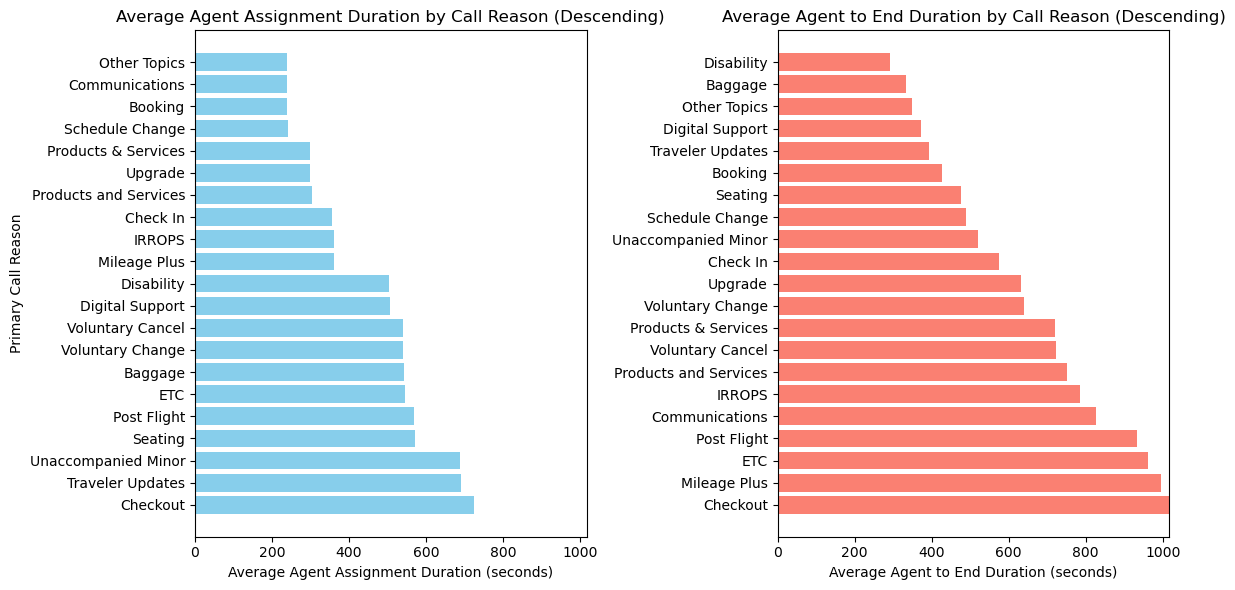

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'duration_reason_cleaned.csv'  # Update this with your actual file path
df = pd.read_csv(file_path)

# Clean up column names by stripping extra spaces
df.columns = df.columns.str.strip()

# Convert the duration columns (from 'HH:MM:SS' format) to seconds
df['agent_assignment_duration_sec'] = pd.to_timedelta(df['agent_assignment_duration']).dt.total_seconds()
df['agent_to_end_duration_sec'] = pd.to_timedelta(df['agent_to_end_duration']).dt.total_seconds()

# Group by 'primary_call_reason' and calculate average durations
grouped_df = df.groupby('primary_call_reason').agg({
    'agent_assignment_duration_sec': 'mean',
    'agent_to_end_duration_sec': 'mean'
}).reset_index()

# Sort the grouped data by 'agent_assignment_duration_sec' and 'agent_to_end_duration_sec' in descending order
grouped_assignment = grouped_df.sort_values(by='agent_assignment_duration_sec', ascending=False)
grouped_end = grouped_df.sort_values(by='agent_to_end_duration_sec', ascending=False)

# Find the maximum value from both columns for unified X-axis resolution
max_duration = max(grouped_df['agent_assignment_duration_sec'].max(), grouped_df['agent_to_end_duration_sec'].max())

# Plot bar charts for average durations
plt.figure(figsize=(12, 6))

# Plot agent assignment duration in descending order
plt.subplot(1, 2, 1)
plt.barh(grouped_assignment['primary_call_reason'], grouped_assignment['agent_assignment_duration_sec'], color='skyblue')
plt.xlabel('Average Agent Assignment Duration (seconds)')
plt.ylabel('Primary Call Reason')
plt.title('Average Agent Assignment Duration by Call Reason (Descending)')
plt.xlim(0, max_duration)  # Set the X-axis limit

# Plot agent to end duration in descending order
plt.subplot(1, 2, 2)
plt.barh(grouped_end['primary_call_reason'], grouped_end['agent_to_end_duration_sec'], color='salmon')
plt.xlabel('Average Agent to End Duration (seconds)')
plt.title('Average Agent to End Duration by Call Reason (Descending)')
plt.xlim(0, max_duration)  # Set the X-axis limit

# Adjust layout
plt.tight_layout()
plt.show()


In [32]:
import pandas as pd
import plotly.graph_objs as go
import plotly.express as px

# Load the dataset
file_path = 'duration_reason_cleaned.csv'  # Update this with your actual file path
df = pd.read_csv(file_path)

# Clean up column names by stripping extra spaces
df.columns = df.columns.str.strip()

# Convert the duration columns (from 'HH:MM:SS' format) to seconds
df['agent_assignment_duration_sec'] = pd.to_timedelta(df['agent_assignment_duration']).dt.total_seconds()
df['agent_to_end_duration_sec'] = pd.to_timedelta(df['agent_to_end_duration']).dt.total_seconds()

# Group by 'primary_call_reason' and calculate average durations
grouped_df = df.groupby('primary_call_reason').agg({
    'agent_assignment_duration_sec': 'mean',
    'agent_to_end_duration_sec': 'mean'
}).reset_index()

# Create a 3D scatter plot with plotly
fig = px.scatter_3d(
    grouped_df,
    x='agent_assignment_duration_sec',
    y='agent_to_end_duration_sec',
    z='primary_call_reason',  # Using primary_call_reason as the z-axis
    color='primary_call_reason',
    labels={
        'agent_assignment_duration_sec': 'Agent Assignment Duration (seconds)',
        'agent_to_end_duration_sec': 'Agent to End Duration (seconds)',
        'primary_call_reason': 'Call Reason'
    },
    title='Interactive 3D Scatter Plot of Call Durations by Reason'
)

# Update layout for better readability
fig.update_layout(scene = dict(
                    xaxis_title='Agent Assignment Duration (seconds)',
                    yaxis_title='Agent to End Duration (seconds)',
                    zaxis_title='Primary Call Reason'),
                  margin=dict(l=0, r=0, b=0, t=40))

# Show the dynamic plot
fig.show()


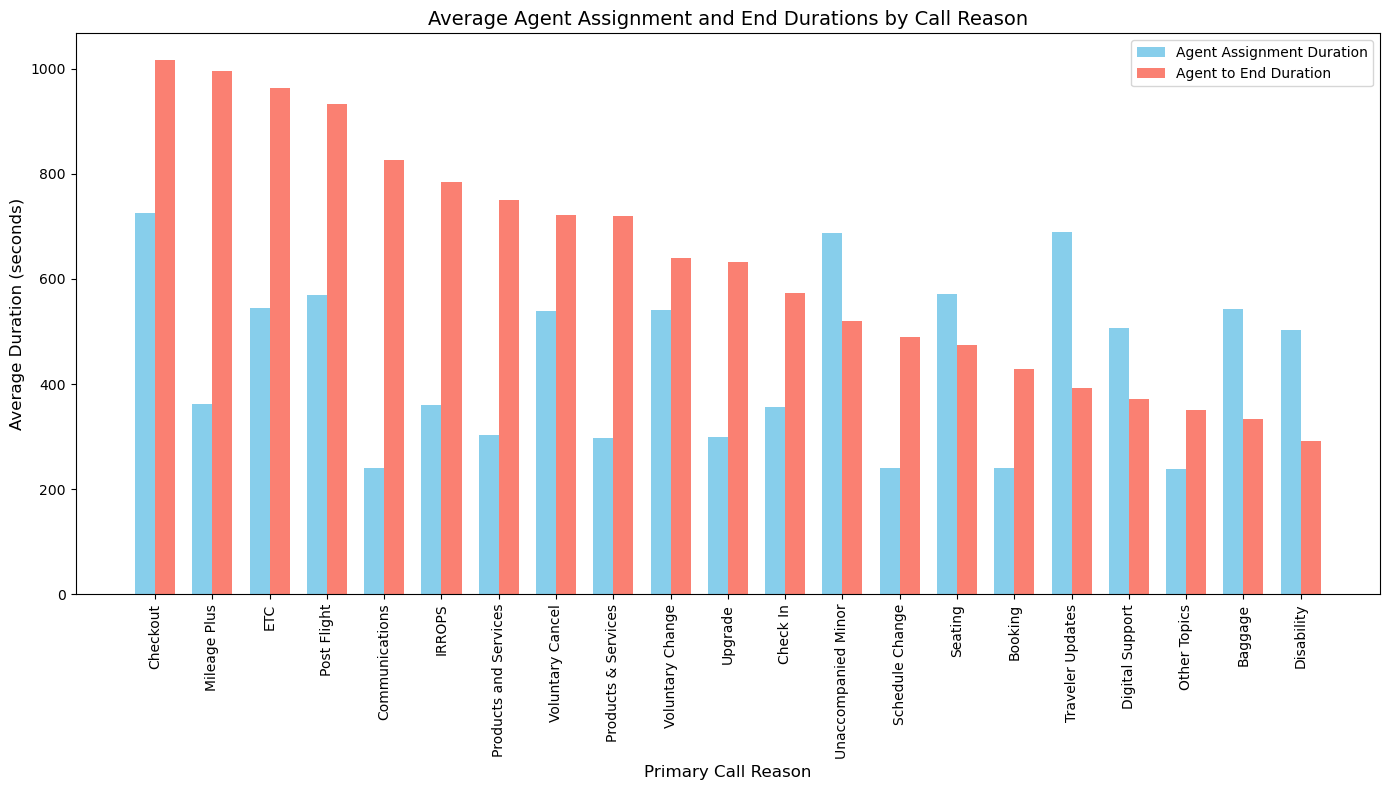

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
file_path = 'duration_reason_cleaned.csv'  # Update this with your actual file path
df = pd.read_csv(file_path)

# Clean up column names by stripping extra spaces
df.columns = df.columns.str.strip()

# Convert the duration columns (from 'HH:MM:SS' format) to seconds
df['agent_assignment_duration_sec'] = pd.to_timedelta(df['agent_assignment_duration']).dt.total_seconds()
df['agent_to_end_duration_sec'] = pd.to_timedelta(df['agent_to_end_duration']).dt.total_seconds()

# Group by 'primary_call_reason' and calculate average durations
grouped_df = df.groupby('primary_call_reason').agg({
    'agent_assignment_duration_sec': 'mean',
    'agent_to_end_duration_sec': 'mean'
}).reset_index()

# Sort the data by 'agent_to_end_duration_sec' in descending order
grouped_df = grouped_df.sort_values(by='agent_to_end_duration_sec', ascending=False)

# Set up bar width and positions
bar_width = 0.35
index = np.arange(len(grouped_df))

# Create the figure and axis
plt.figure(figsize=(14, 8))

# Plot the bars for 'agent_assignment_duration_sec'
plt.bar(index, grouped_df['agent_assignment_duration_sec'], bar_width, label='Agent Assignment Duration', color='skyblue')

# Plot the bars for 'agent_to_end_duration_sec' right next to 'agent_assignment_duration_sec'
plt.bar(index + bar_width, grouped_df['agent_to_end_duration_sec'], bar_width, label='Agent to End Duration', color='salmon')

# Add labels and title
plt.xlabel('Primary Call Reason', fontsize=12)
plt.ylabel('Average Duration (seconds)', fontsize=12)
plt.title('Average Agent Assignment and End Durations by Call Reason', fontsize=14)

# Add the primary call reasons as tick labels, placed in the middle of the two bars
plt.xticks(index + bar_width / 2, grouped_df['primary_call_reason'], rotation=90)

# Add a legend
plt.legend()

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()


In [66]:
import pandas as pd

# Load the two CSV files into DataFrames
df1 = pd.read_csv('./duration_reason_cleaned.csv')
df2 = pd.read_csv('./sentiment_statisticscc1e57a.csv')  # Replace with your actual file name

# Clean up the column names by stripping extra spaces (if needed)
df1.columns = df1.columns.str.strip()
df2.columns = df2.columns.str.strip()

# Merge the two DataFrames on 'call_id'
merged_df = pd.merge(df1, df2, on='call_id', how='outer')  # Use 'outer', 'left', or 'right' as needed


merged_df.to_csv('./duration_reason_sentiment.csv', index=False)

# Display the first few rows of the merged DataFrame (optional)
merged_df.head()


,call_id,customer_id,call_duration,agent_assignment_duration,agent_to_end_duration,primary_call_reason,agent_id,agent_tone,customer_tone,average_sentiment,silence_percent_average
0,131642,1.032626e+08,00:13:00,00:09:00,00:04:00,Seating,132311,neutral,polite,-0.07,0.03
1,325527,8.994245e+09,00:09:00,00:04:00,00:05:00,IRROPS,607742,neutral,angry,-0.19,0.05
2,526871,5.769982e+09,00:16:00,00:09:00,00:07:00,Voluntary Change,748700,neutral,frustrated,-0.22,0.13
3,634548,9.534089e+09,00:24:00,00:10:00,00:14:00,Seating,542034,neutral,polite,-0.11,0.24
4,693921,3.046806e+09,00:17:00,00:11:00,00:06:00,Voluntary Change,633922,neutral,frustrated,-0.02,0.14


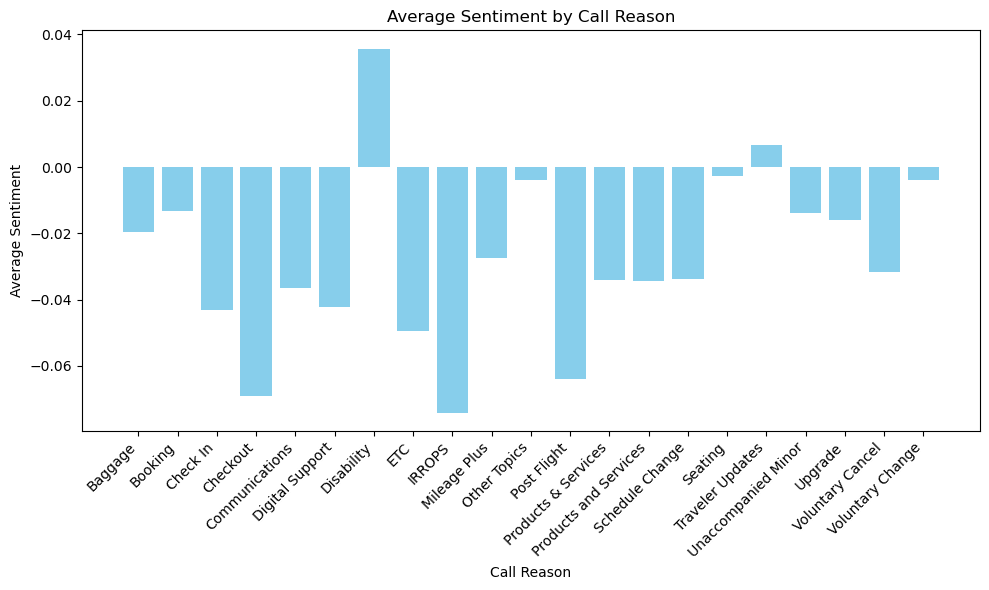

In [76]:
import matplotlib.pyplot as plt

data = pd.read_csv('duration_reason_sentiment.csv')

# Check data types of columns
data.dtypes

# Convert 'average_sentiment' to numeric, forcing errors to NaN
data['average_sentiment'] = pd.to_numeric(data['average_sentiment'], errors='coerce')

# Now try to group and plot again
grouped_data = data.groupby('primary_call_reason')['average_sentiment'].mean()

# Plot
plt.figure(figsize=(10, 6))
plt.bar(grouped_data.index, grouped_data.values, color='skyblue')

# Labels and title
plt.xlabel('Call Reason')
plt.ylabel('Average Sentiment')
plt.title('Average Sentiment by Call Reason')
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

# Show the plot
plt.show()


In [77]:
import pandas as pd

# Load the CSV file into a DataFrame
file_path = './callsf0d4f5a.csv'  # Replace with your CSV file path

try:
    df = pd.read_csv(file_path)

    # Check if the 'transcript' column exists
    if 'call_transcript' in df.columns:
        # Extract the 'transcript' column into a list
        transcripts = df['call_transcript'].dropna().tolist()  # Remove any missing values

        # Optional: Display the first few transcripts
        print(transcripts[:5])  # Print the first 5 transcripts
    else:
        print("The 'transcript' column does not exist in the CSV file.")
except FileNotFoundError:
    print(f"The file {file_path} does not exist.")
except Exception as e:
    print(f"An error occurred: {e}")


["\n\nAgent: Thank you for calling United Airlines customer service, my name is Sarah how may I help you?\n\nCustomer: Hi, yeah I'm calling because my flight from Chicago to New York was delayed by over 3 hours! This is ridiculous, I'm missing important meetings because of this. \n\nAgent: I'm so sorry to hear about the delay, that's definitely frustrating. Umm, let me pull up your reservation and take a look at what happened. *typing sounds* Okay, it looks like there was severe weather in Chicago that caused multiple flight cancellations and delays across the board for all the airlines. Ahh shoot, yeah your original flight was scheduled to depart at 2pm but didn't actually take off until after 5pm.\n\nCustomer: Ugh this is such poor planning on United's part, you should have rerouted passengers or put us on other flights that weren't delayed. Now I've wasted a whole day. \n\nAgent: I understand your frustration sir, delays are never fun. Let me see what options I have available to hel

In [78]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

nltk.download('stopwords')

# Step 1: Preprocessing - removing stopwords and tokenizing
def preprocess_text(text):
    stop_words = set(stopwords.words('english'))
    tokens = nltk.word_tokenize(text.lower())
    tokens = [word for word in tokens if word.isalpha() and word not in stop_words]
    return " ".join(tokens)

preprocessed_transcripts = [preprocess_text(transcript) for transcript in transcripts]

# Step 2: Vectorizing with TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(preprocessed_transcripts)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\anshu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [79]:
# Step 3: Perform Hierarchical Clustering
# Agglomerative Clustering using 'ward' linkage (which uses Euclidean distance)
clustering = AgglomerativeClustering(n_clusters=None, distance_threshold=0, linkage='ward')
clustering.fit(X.toarray())

# Step 4: Dendrogram Visualization
# Use scipy's linkage function for generating the dendrogram
Z = linkage(X.toarray(), method='ward')  # 'ward' minimizes the variance within clusters

# Plot the dendrogram
plt.figure(figsize=(10, 7))
plt.title("Dendrogram for Hierarchical Clustering")
dendrogram(Z)
plt.show()
